# 1. Установка и импорт

In [1]:
# Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from scipy import stats

# Настройки стилей графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

plt.rcParams.update({
    'figure.figsize': (12, 6),
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.dpi': 100,
    'savefig.dpi': 300
})

# 2. Загрузка данных

In [2]:
df = pd.read_csv("titanic_train.csv", index_col="PassengerId")

Задание 1: вывести на экран "шапку", размер датафрейма, количество признаков, представленные типы данных и статистику числовых признаков

In [61]:
print('Размер датасета:', df.shape)
print('Количество признаков:', df.shape[1])
display(df.head(10))
print('Информация о типах данных:')
print(df.dtypes, '\n')
print('Базовая статистика числовых признаков:')
print(df.describe())
print(f'\nВыжившие: {sum(df['Survived'])} ({sum(df['Survived']/len(df)*100):.2f}%)')

Размер датасета: (891, 11)
Количество признаков: 11


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


Информация о типах данных:
Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object 

Базовая статистика числовых признаков:
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329

# 3. Анализ пропусков с использованием msno, dropna, isnull

Задание 2: провести анализ по плану

Количество пропусков по признакам:
  Survived: нет пропусков
  Pclass: нет пропусков
  Name: нет пропусков
  Sex: нет пропусков
  Age: 177 пропусков (19.9%)
  SibSp: нет пропусков
  Parch: нет пропусков
  Ticket: нет пропусков
  Fare: нет пропусков
  Cabin: 687 пропусков (77.1%)
  Embarked: 2 пропусков (0.2%)


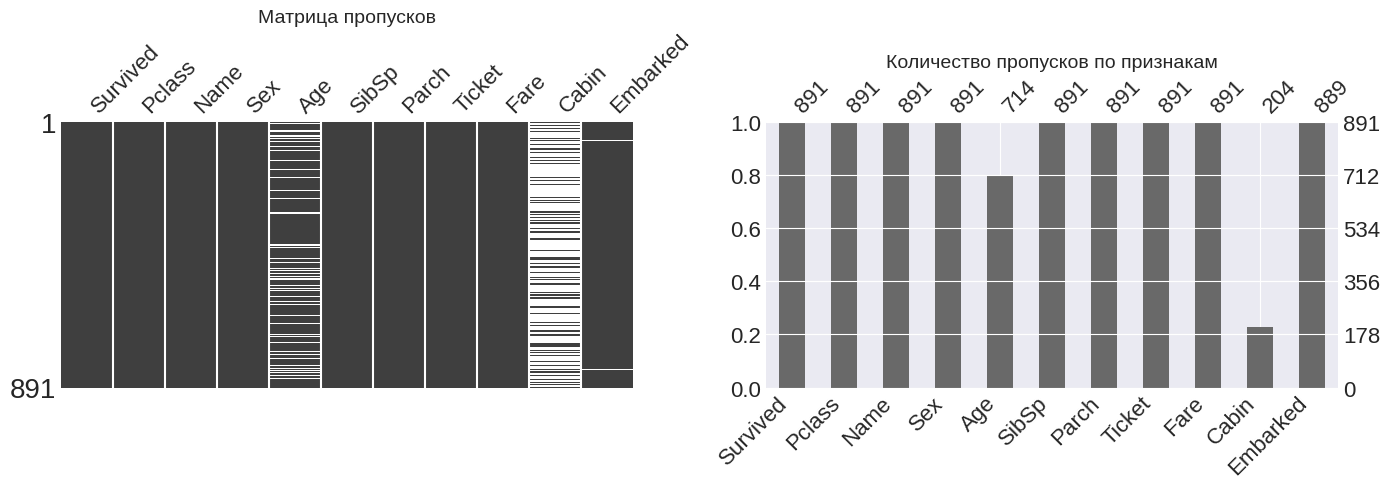

Анализ с использованием dropna():
Исходный размер: (891, 11)
После dropna() (удаление всех строк с пропусками): (183, 11)
После dropna(axis=1) (удаление колонок с пропусками): (891, 8)
После dropna(thresh=10): (733, 11)


In [4]:
# 1. Используем isnull для подсчета пропусков
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

print("Количество пропусков по признакам:")
for col in df.columns:
    if missing_data[col] > 0:
        print(f"  {col}: {missing_data[col]} пропусков ({missing_percent[col]:.1f}%)")
    else:
        print(f"  {col}: нет пропусков")

# 2. Визуализация пропусков с помощью msno
#       - Матрица пропусков
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
msno.matrix(df, ax=axes[0], sparkline=False)
axes[0].set_title('Матрица пропусков')

#       - Bar chart пропусков
msno.bar(df, ax=axes[1])
axes[1].set_title('Количество пропусков по признакам')

plt.tight_layout()
plt.show()

# 3. Применение dropna для анализа
#       - Разные стратегии удаления пропусков: все строки, все столбцы, с порогом
print("Анализ с использованием dropna():")
print(f"Исходный размер: {df.shape}")

# dropna с разными стратегиями
df_dropped_all = df.dropna()
print(f"После dropna() (удаление всех строк с пропусками): {df_dropped_all.shape}")

df_dropped_cols = df.dropna(axis=1)
print(f"После dropna(axis=1) (удаление колонок с пропусками): {df_dropped_cols.shape}")

# dropna с threshold
df_dropped_thresh = df.dropna(thresh=round(len(df.columns)*0.9)) # оставляем строки с хотя бы 90% заполненных значений
print(f"После dropna(thresh={round(len(df.columns)*0.9)}): {df_dropped_thresh.shape}")

Больше всего пропусков в столбце "Cabin" (номер каюты) - более 77% --> его можно удалить из датасета.

# 4. Визуализация с boxplot и iqr

Задание 3: визуализируйте числовые признаки с boxplot и посчитывайте выбросы с iqr

Числовые признаки: ['Age', 'Fare']



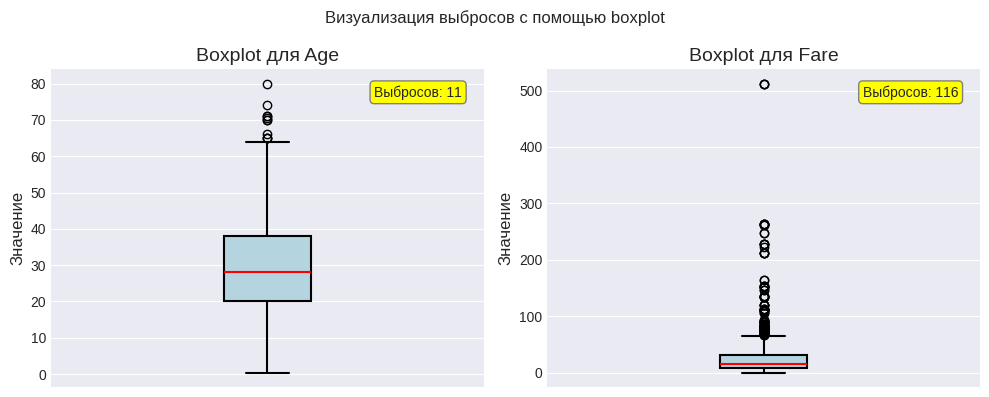


Обнаружение выбросов методом IQR:

Age:
  Q1: 20.12, Q3: 38.00, IQR: 17.88
  Границы: [-6.69, 64.81]
  Выбросов: 11 (1.5%)
  Min выброс: 65.00
  Max выброс: 80.00

Fare:
  Q1: 7.91, Q3: 31.00, IQR: 23.09
  Границы: [-26.72, 65.63]
  Выбросов: 116 (13.0%)
  Min выброс: 66.60
  Max выброс: 512.33


In [13]:
# Выбираем непрерывные числовые признаки для анализа
numeric_cols = ['Age','Fare']
print(f"Числовые признаки: {numeric_cols}\n")

# Применяем IQR для количественного анализа
def detect_outliers_iqr(series):
    """Обнаружение выбросов методом IQR"""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = series[(series < lower_bound) | (series > upper_bound)]

    return {
        'q1': Q1,
        'q3': Q3,
        'iqr': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers': outliers,
        'n_outliers': len(outliers),
        'percent_outliers': len(outliers) / len(series) * 100
    }

results = [detect_outliers_iqr(df[col].dropna()) for col in numeric_cols]

# Создаем subplots для ящиков с усами
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Визуализация выбросов с помощью boxplot
fig.suptitle("Визуализация выбросов с помощью boxplot")
for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    sns.boxplot(y=df[col].dropna(), ax=ax,
                width=0.2, color='lightblue',
                linecolor='black', linewidth=1.5,
                medianprops={"color": "red"})
    ax.set_title(f'Boxplot для {col}')
    ax.set_ylabel('Значение')
    # Добавляем подписи с количеством выбросов
    ax.text(0.95, 0.95,
            f"Выбросов: {results[idx]["n_outliers"]}",
            transform=ax.transAxes,
            horizontalalignment='right',
            verticalalignment='top',
            fontsize=10,
            bbox=dict(boxstyle='round', facecolor='yellow', edgecolor='gray'))

plt.tight_layout()
plt.show()

# Вывод результатов IQR
print('\nОбнаружение выбросов методом IQR:')
for idx, col in enumerate(numeric_cols):
    print(f"\n{col}:")
    result = results[idx]
    print(f"  Q1: {result['q1']:.2f}, Q3: {result['q3']:.2f}, IQR: {result['iqr']:.2f}")
    print(f"  Границы: [{result['lower_bound']:.2f}, {result['upper_bound']:.2f}]")
    print(f"  Выбросов: {result['n_outliers']} ({result['percent_outliers']:.1f}%)")

    if result['n_outliers'] > 0:
        print(f"  Min выброс: {result['outliers'].min():.2f}")
        print(f"  Max выброс: {result['outliers'].max():.2f}")

Age: всего 1.5% выбросов, можно удалить все.

Fare: 13% выбросов, можно удалить частично, например, от 90-го или 95-го перцентиля.

In [32]:
n_outliers_90 = sum(results[1]['outliers'] > df['Fare'].quantile(.9))
n_outliers_95 = sum(results[1]['outliers'] > df['Fare'].quantile(.95))

print("Количество выбросов для признака Fare в области от:")
print(f"90-го перцентиля: {n_outliers_90} (после удаления - {results[1]['n_outliers']-n_outliers_90})")
print(f"95-го перцентиля: {n_outliers_95} (после удаления - {results[1]['n_outliers']-n_outliers_95})")

Количество выбросов для признака Fare в области от:
90-го перцентиля: 87 (после удаления - 29)
95-го перцентиля: 45 (после удаления - 71)


# 5. Анализ распределений и взаимосвязей

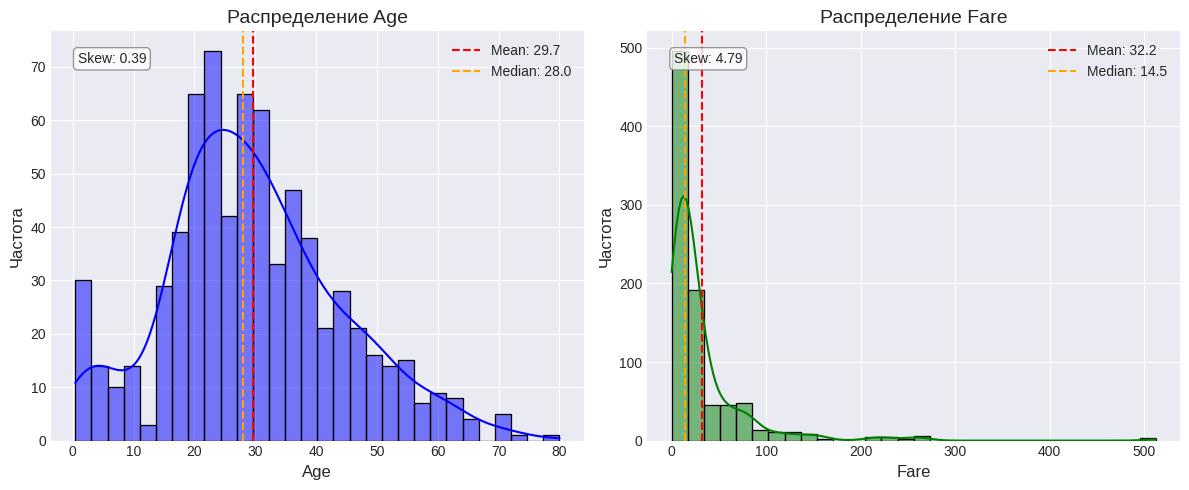

In [33]:
# Визуализация распределений для двух непрерывных признаков
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Гистограмма для Age
ax = axes[0]
sns.histplot(df['Age'].dropna(), kde=True, ax=ax,
             bins=30, edgecolor='black', color='b')
ax.set_title(f'Распределение Age')
ax.set_xlabel('Age')
ax.set_ylabel('Частота')

# Добавляем статистики для Age (mean, median, skew)
age_skewness = df['Age'].skew()
age_mean = df['Age'].mean()
age_median = df['Age'].median()

ax.text(0.05, 0.95, f'Skew: {age_skewness:.2f}',
        transform=ax.transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'))
ax.axvline(age_mean, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {age_mean:.1f}')
ax.axvline(age_median, color='orange', linestyle='--', linewidth=1.5, label=f'Median: {age_median:.1f}')
ax.legend(loc='upper right')

# Гистограмма для Fare
ax = axes[1]
sns.histplot(df['Fare'].dropna(), kde=True, ax=ax,
             bins=30, edgecolor='black', color='g')
ax.set_title(f'Распределение Fare')
ax.set_xlabel('Fare')
ax.set_ylabel('Частота')

# Добавляем статистики для Fare (mean, median, skew)
fare_skewness = df['Fare'].skew()
fare_mean = df['Fare'].mean()
fare_median = df['Fare'].median()

ax.text(0.05, 0.95, f'Skew: {fare_skewness:.2f}',
        transform=ax.transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray'))
ax.axvline(fare_mean, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {fare_mean:.1f}')
ax.axvline(fare_median, color='orange', linestyle='--', linewidth=1.5, label=f'Median: {fare_median:.1f}')
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

Распределение Age стремится к нормальному с небольшим смещением (выбросы 60+ и около 0). Признак Fare (стоимость билета) сильно смещен: большинство билетов стоили до 50$. На гистограмме также заметно значительное количество выбросов, выявленных на предыдущем шаге. Медиана и среднее сильно отличаются, что также указывает на ассиметричное распределение данных признака с преобладанием низких значений.

Категориальные признаки: ['Pclass', 'Sex', 'Parch', 'SibSp', 'Embarked']



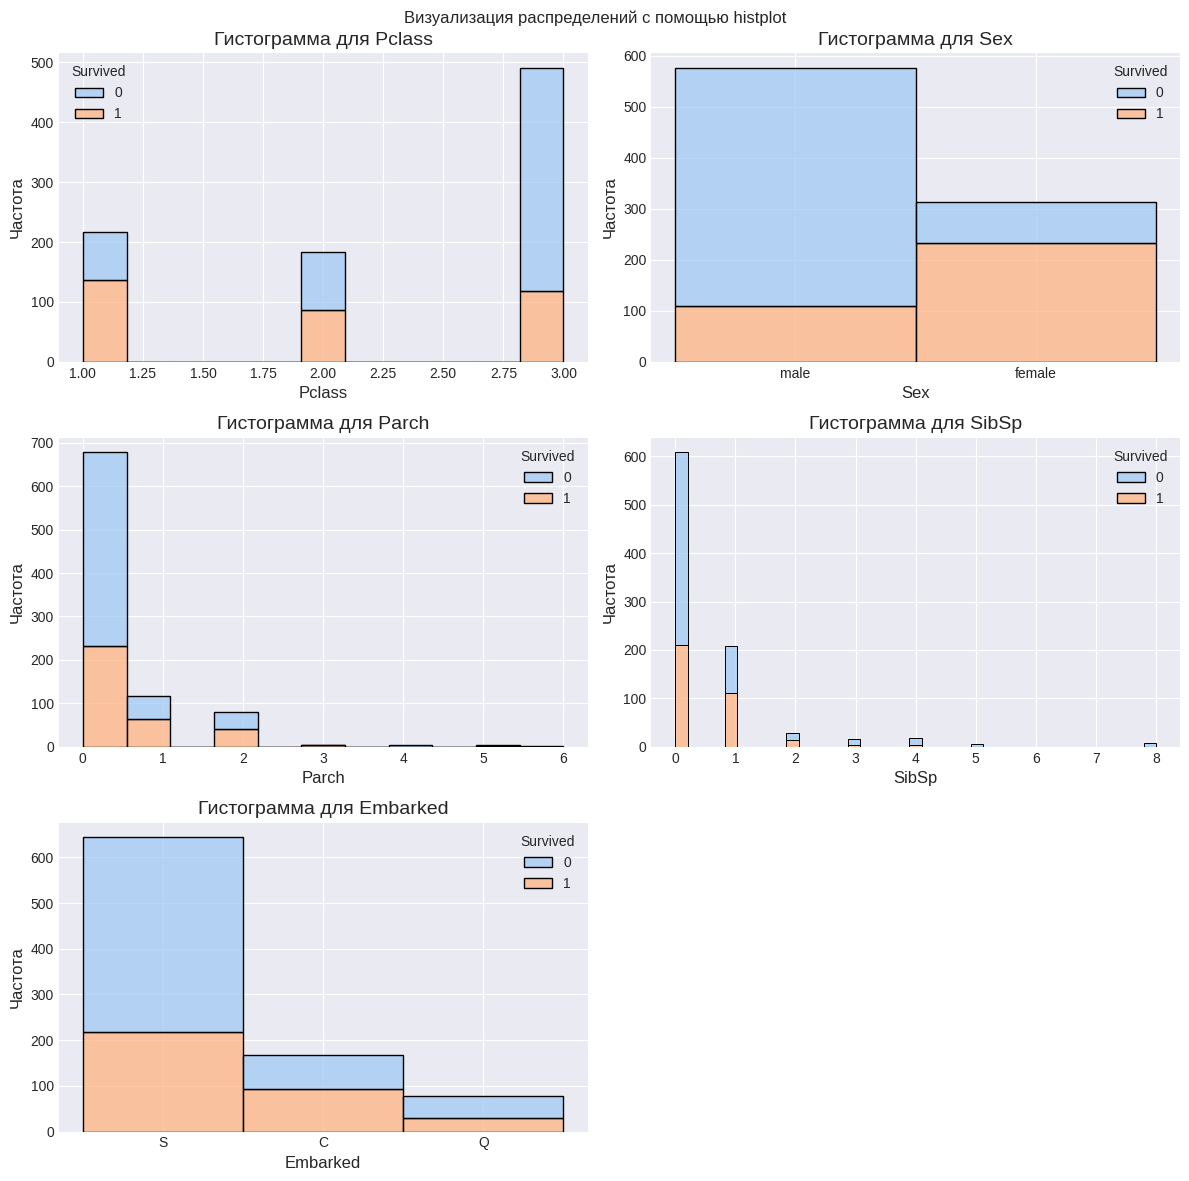

In [64]:
# Распределение категориальных признаков
categ_cols = ['Pclass', 'Sex', 'Parch', 'SibSp', 'Embarked']
print(f"Категориальные признаки: {categ_cols}\n")

# Создаем subplots для гистрограмм
fig, axes = plt.subplots(len(categ_cols) // 2 + len(categ_cols) % 2, 2, figsize=(12, 12))
# При нечетном количестве признаков удаляем один subplot
if len(categ_cols) % 2 == 1:
    fig.delaxes(axes.flatten()[-1])

fig.suptitle("Визуализация распределений с помощью histplot")
for idx, col in enumerate(categ_cols):
    ax = axes[idx // 2, idx % 2]
    sns.histplot(x=df[col].dropna(), ax=ax,
                 hue=df['Survived'], multiple='stack',
                 palette='pastel')
    ax.set_title(f'Гистограмма для {col}')
    ax.set_ylabel('Частота')

plt.tight_layout()
plt.show()

На гистограммах можно увидеть распределение значений признаков с учетом целевой переменной Survived.
* **Pclass**: 3 класс пассажиров - самый многочисленный и имеет самый низкую долю выживших в сравнении с 1 и 2 классами. Наибольшая доля выживших в 1 классе --> скорее всего, класс пассажира - значимый признак для предсказания целевой переменной.
* **Sex**: мужчин на корабле было почти вдвое больше, чем женщин, однако среди женщин спаслось более 70%, а среди мужчин - меньше 20% (мы помним, что в шлюпки первыми сажали женщин и детей). Также значимый признак для потенциального классификатора.
* **Parch**, **SibSp**: большинство пассажиров ехало без родителей/детей и сиблингов/супругов, но среди тех, кто путешествовал с семьей, доля выживших в среднем выше. Возможно, более эффективно представить эти признаки как бинарные (с/без).
* **Embarked** - порт отправления (C = Cherbourg; Q = Queenstown; S = Southampton): наибольшая часть пассажиров села в Саутгемптоне, наименьшая - в Куинстауне, а самый высокий процент выживших среди пассажиров, отправлявшихся из Шербурга.

Корреляционная матрица (Пирсон):
          Survived  Pclass    Age  SibSp  Parch   Fare
Survived     1.000  -0.338 -0.077 -0.035  0.082  0.257
Pclass      -0.338   1.000 -0.369  0.083  0.018 -0.549
Age         -0.077  -0.369  1.000 -0.308 -0.189  0.096
SibSp       -0.035   0.083 -0.308  1.000  0.415  0.160
Parch        0.082   0.018 -0.189  0.415  1.000  0.216
Fare         0.257  -0.549  0.096  0.160  0.216  1.000 



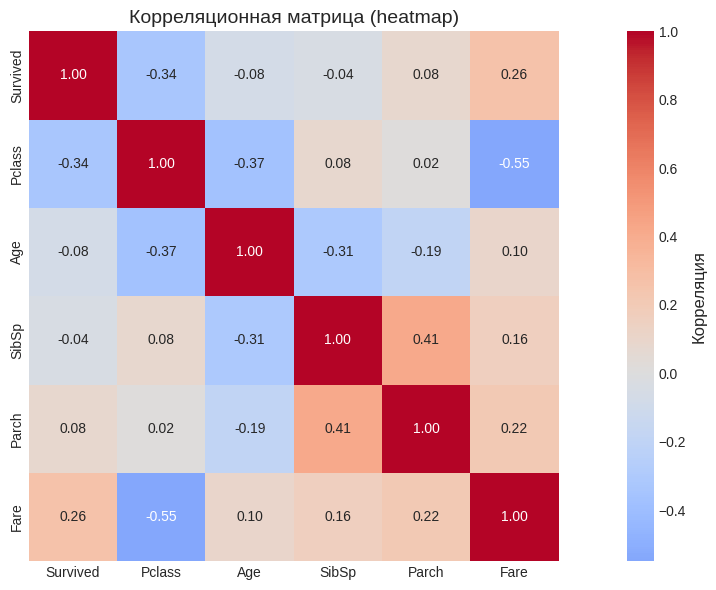

In [ ]:
# Расчет и вывод на экран корреляционной матрицы
correlation_matrix = df[numeric_cols].corr()

print("Корреляционная матрица (Пирсон):")
print(correlation_matrix.round(3), "\n")

fig, axes = plt.subplots(1, 1, figsize=(14, 6))

# Коррелограмма (heatmap)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f',
            annot_kws={"size": 10},
            cmap='coolwarm', center=0, ax=axes,
            square=True, cbar_kws={'label': 'Корреляция'})
axes.set_title('Корреляционная матрица (heatmap)')

plt.tight_layout()
plt.show()

Из числовых признаков наибольшее влияние на Survived оказывают пассажирский класс и стоимость билета. Между этими признаками есть средняя отрицательная корреляция, но не прямая. Потенциально можно попробовать удалить один из них. Признаки Parch, SibSp и Age почти не влияют на целевую переменную (корреляция менее 0,1).